In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Linear regression

## Data

In [12]:
df = pd.read_csv('./ex1data1.txt', names=['population', 'profit'])

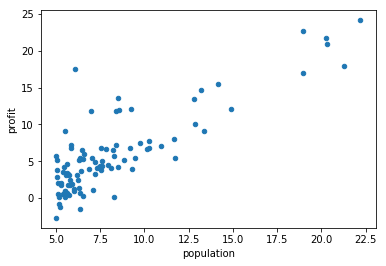

In [13]:
df.plot.scatter('population', 'profit')

- Design matrix: $X$
- Labels: $y$

In [92]:
X = np.stack( (np.ones(len(df)), np.array(df['population'])), axis=-1 )

In [99]:
X

array([[  1.    ,   6.1101],
       [  1.    ,   5.5277],
       [  1.    ,   8.5186],
       [  1.    ,   7.0032],
       [  1.    ,   5.8598],
       [  1.    ,   8.3829],
       [  1.    ,   7.4764],
       [  1.    ,   8.5781],
       [  1.    ,   6.4862],
       [  1.    ,   5.0546],
       [  1.    ,   5.7107],
       [  1.    ,  14.164 ],
       [  1.    ,   5.734 ],
       [  1.    ,   8.4084],
       [  1.    ,   5.6407],
       [  1.    ,   5.3794],
       [  1.    ,   6.3654],
       [  1.    ,   5.1301],
       [  1.    ,   6.4296],
       [  1.    ,   7.0708],
       [  1.    ,   6.1891],
       [  1.    ,  20.27  ],
       [  1.    ,   5.4901],
       [  1.    ,   6.3261],
       [  1.    ,   5.5649],
       [  1.    ,  18.945 ],
       [  1.    ,  12.828 ],
       [  1.    ,  10.957 ],
       [  1.    ,  13.176 ],
       [  1.    ,  22.203 ],
       [  1.    ,   5.2524],
       [  1.    ,   6.5894],
       [  1.    ,   9.2482],
       [  1.    ,   5.8918],
       [  1.  

In [93]:
y = np.array(df['profit'])

## Hypothesis

In [94]:
def h(X, theta):
    h = np.inner(X,theta)
    return h

In [107]:
def show_plot(theta):
    f,a = plt.subplots()
    df.plot.scatter('population', 'profit', ax=a)
    x1 = np.linspace(0.0, 25.0, 100)
    X_model = np.stack( (np.ones(100), x1), axis=-1)
    y_model = h(X_model, theta)
    a.plot(x1, y_model, c='r')

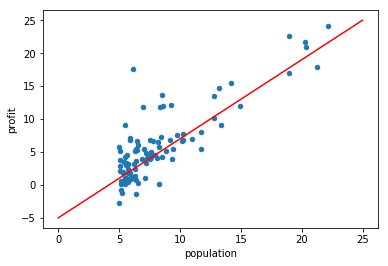

In [108]:
show_plot([-5.0, 1.2])

## Cost

In [96]:
def cost(X, y, theta):
    m = len(y)
    cost = np.sum( (h( X, theta) - y)**2 )
    cost *= 1.0/(2.0*m)
    return cost

In [97]:
cost(X, y, [-5.0, 1.2])

5.0258282724041248

## Update rule

In [105]:
def gradient_descent(X, y, alpha, theta):
    m = len(y)
    gradient = np.inner(np.transpose(X), (h(X,theta) - y))/m
    theta_upd = theta - alpha * gradient
    return theta_upd

## Show iteration

Iteration: 0
Cost: 4.599415584316898
Theta: [-4.98952625  1.28443118]
Iteration: 1
Cost: 4.585562486807785
Theta: [-4.98604665  1.29927742]
Iteration: 2
Cost: 4.584747530217063
Theta: [-4.98381327  1.3017543 ]
Iteration: 3
Cost: 4.584345934199181
Theta: [-4.98180434  1.30203267]
Iteration: 4
Cost: 4.583958754036431
Theta: [-4.97983821  1.30192051]


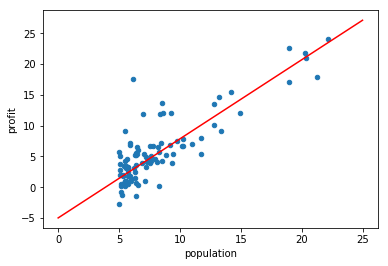

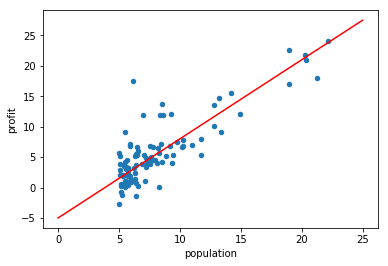

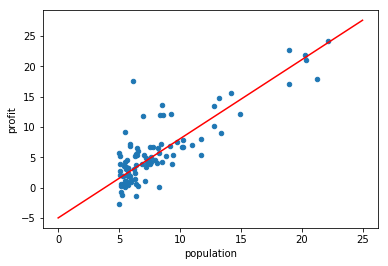

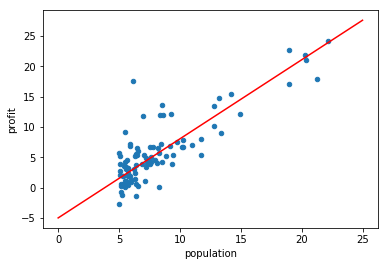

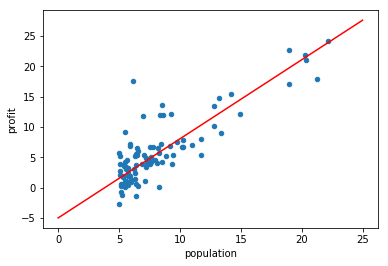

In [118]:
theta = [-5.0, 1.2]
alpha = 0.01
for it in range(5):
    theta = gradient_descent(X, y, alpha, theta)
    show_plot(theta)
    C = cost(X, y, theta)
    print("Iteration: {}".format(it))
    print("Cost: {}".format(C))
    print("Theta: {}".format(theta))